# Load the excel file first

9.3.3 maintenance_data.xlsx


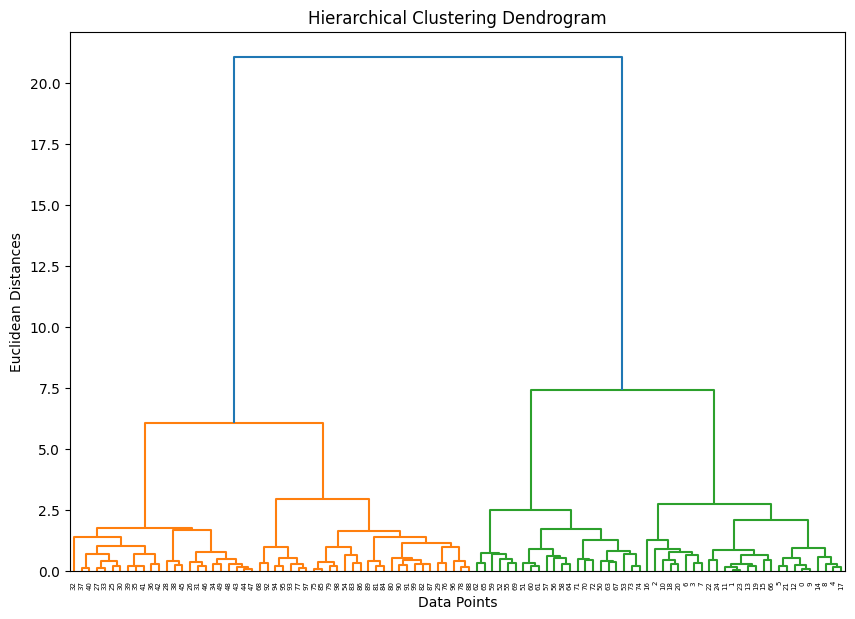

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset from an Excel file
# Replace 'path_to_file' with the path to your Excel file
df = pd.read_excel('9.3.3 maintenance_data.xlsx')

# Select relevant features for clustering
# Replace ['Feature1', 'Feature2', ...] with the names of your features
features = df[['Frequency_of_Maintenance', 'Sensor_Reading_Fluctuation', 'Output_Efficiency']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Compute the linkage matrix using Ward's method
linkage_matrix = linkage(features_scaled, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(16, 9))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Assuming 'linkage_matrix' is from your previous hierarchical clustering
# Determine the clusters, here 't' is the threshold to cut the dendrogram
# which you would have to decide based on your dendrogram analysis
clusters = fcluster(linkage_matrix, t=4, criterion='maxclust')

# Add cluster labels to the original dataframe
df['cluster'] = clusters

# Calculate the central tendencies for the features within each cluster
cluster_profiles_mean = df.groupby('cluster').mean()
cluster_profiles_median = df.groupby('cluster').median()

# Print out the cluster profiles for mean
print("Cluster profiles based on mean:")
print(cluster_profiles_mean)

# Determine defining characteristics by examining feature differences
defining_characteristics = cluster_profiles_mean.std().sort_values(ascending=False)
print("\nDefining characteristics (features with the largest standard deviation across clusters):")
print(defining_characteristics)


Cluster profiles based on mean:
         Frequency_of_Maintenance  Sensor_Reading_Fluctuation  \
cluster                                                         
1                       11.921773                    0.184172   
2                        8.801331                    0.310250   
3                        5.496541                    0.584747   
4                        2.986110                    0.736870   

         Output_Efficiency  
cluster                     
1                91.481765  
2                84.441864  
3                75.436496  
4                60.813804  

Defining characteristics (features with the largest standard deviation across clusters):
Output_Efficiency             13.231086
Frequency_of_Maintenance       3.893451
Sensor_Reading_Fluctuation     0.252046
dtype: float64


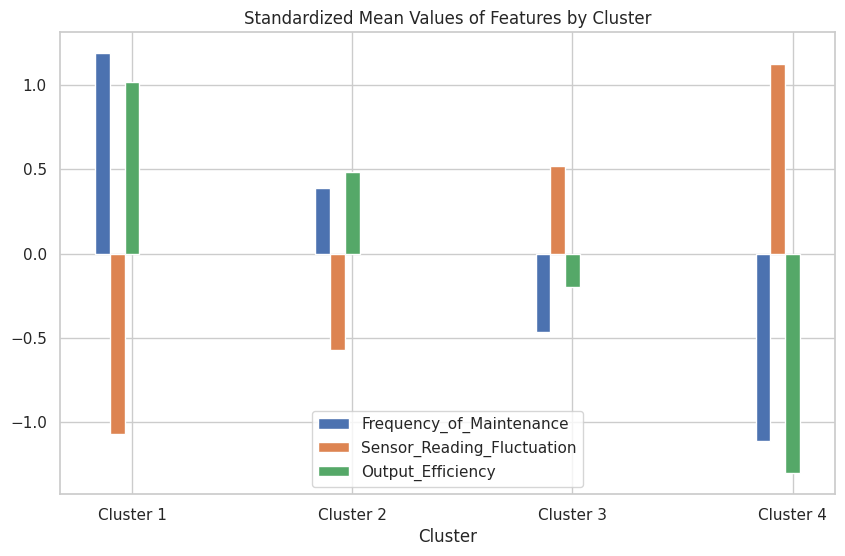

In [ ]:
# Assuming 'cluster_profiles_mean' has the cluster means already computed

# Standardize the features (z-score normalization)
standardized_cluster_means = (cluster_profiles_mean - cluster_profiles_mean.mean()) / cluster_profiles_mean.std()

# Filter the DataFrame for only the columns we are interested in
standardized_cluster_means = standardized_cluster_means[['Frequency_of_Maintenance', 'Sensor_Reading_Fluctuation', 'Output_Efficiency']]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# We need to create a grouped bar chart, so we need to arrange the bars
# Define the number of clusters and the total width of a group of bars
n_clusters = len(standardized_cluster_means)
total_width = 0.8
single_width = total_width / n_clusters
bar_width = single_width / len(standardized_cluster_means.columns)

# The x position of bars
bar_positions = np.arange(len(standardized_cluster_means))

# Plot each feature
for i, (column_name, column_data) in enumerate(standardized_cluster_means.items()):
    ax.bar(bar_positions + i * bar_width, column_data, width=bar_width, label=column_name)

# Set the position of the x ticks
ax.set_xticks(bar_positions + total_width / (2 * len(standardized_cluster_means.columns)))
# Set the labels for the x ticks
ax.set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
# Set the x-axis label
ax.set_xlabel('Cluster')
# Set the chart title
ax.set_title('Standardized Mean Values of Features by Cluster')
# Enable the legend
ax.legend()

# Show the plot
plt.show()
